<a href="https://colab.research.google.com/github/TheeranatSri/DADS7202_project_1/blob/main/deepLearning_project_1_autoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.2 MB/s 
     |████████████████████████████████| 135 kB 59.4 MB/s 
     |████████████████████████████████| 1.6 MB 50.1 MB/s 


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import autokeras as ak
from typing import Counter
from sklearn.model_selection import train_test_split
import sklearn
import imblearn
import seaborn as sns
from datetime import datetime as dt
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(f'autokeras.__version__ :{ak.__version__}\n\
tensorflow.__version__ :{ak.__version__}\n\
sklearn.__version__ :{sklearn.__version__}\n\
imblearn.__version__ :{imblearn.__version__}')

autokeras.__version__ :1.0.20
tensorflow.__version__ :1.0.20
sklearn.__version__ :1.0.2
imblearn.__version__ :0.8.1


In [ ]:
df_raw_=pd.read_csv(r'/content/drive/MyDrive/ml/data.csv')
df_raw_.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df_raw_.columns=[i.strip() for i in df_raw_.columns]
df_raw_.rename(columns={'Bankrupt?':'Bankrupt'},inplace = True)

### check Imbalance data


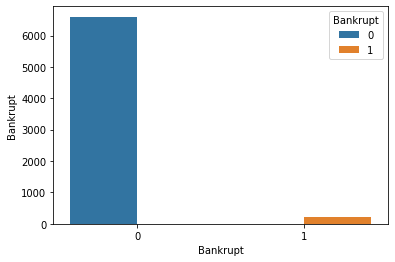

In [ ]:
bankrupt=df_raw_.groupby(['Bankrupt'])[['Bankrupt']].count()
ax = sns.barplot(data=bankrupt,x=bankrupt.index,y=bankrupt['Bankrupt'],hue=bankrupt.index)

In [ ]:
y = df_raw_['Bankrupt']
X = df_raw_.drop('Bankrupt',axis=1)

### Split data into 3 part 
1.   unseen data จะถูกแบ่งจาก 20 % ของ main data
2.   อีก 80% main data จะถูกแบ่งเป็น 2 ส่วน คือ 
    * 70% สำหรับ Train data
    * 30% สำหรับ Test data


In [ ]:
X_unseen, X_model, y_unseen, y_model = train_test_split(X, y, test_size=0.2, random_state=66)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

###  Over Sampling Datase

In [ ]:
sm = SMOTE(random_state=66)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 4607, 1: 4607})


In [ ]:
# first seed [369, 59, 818]
time_lst=[]
ran_lst=[]
acc_lst=[]

for i in range(3):
  start_time=dt.now()
  ran_seed=np.random.randint(1000)
  # Generate new seed
  while ran_seed in ran_lst:
    ran_seed=np.random.randint(1000)
  ran_lst.append(ran_seed)
  clf = ak.StructuredDataClassifier(overwrite=True, max_trials=15,seed=ran_seed)
  clf.fit(X_train, y_train ,epochs=10)
  end_time=dt.now()
  time_=end_time-start_time
  time_lst.append(time_)
  loss, acc = clf.evaluate(X_test, y_test)
  acc_lst.append(acc)

Trial 15 Complete [00h 00m 23s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 04m 41s
Epoch 1/10
288/288 [==============================] - 2s 4ms/step - loss: 0.0885 - accuracy: 0.9661
Epoch 2/10
288/288 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.9106
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 0.4064 - accuracy: 0.9405
Epoch 4/10
288/288 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.9503
Epoch 5/10
288/288 [==============================] - 1s 4ms/step - loss: 0.5474 - accuracy: 0.9443
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 0.2073 - accuracy: 0.9521
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1668 - accuracy: 0.9458
Epoch 8/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9573
Epoch 9/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1508 - accu

In [74]:
print('Avg. Acc ',np.average(acc_lst))

Avg. Acc  0.8378950754801432


In [87]:
for i,j,k in zip(ran_lst,time_lst,acc_lst):
  print(f"Random seed : {i}  Time : {j}  accuracy : {k:.4f}")

Random seed : 369  Time : 0:05:20.785884  accuracy : 0.8490
Random seed : 59  Time : 0:05:17.096101  accuracy : 0.8333
Random seed : 818  Time : 0:05:04.372443  accuracy : 0.8314


In [ ]:
#build model from seed that has maximum accuracy
max_acc_idx=acc_lst.index(max(acc_lst))
seed_best = ran_lst[max_acc_idx]
clf_best = ak.StructuredDataClassifier(overwrite=True, max_trials=15,seed=seed_best)
# Feed the structured data classifier with training data.
clf_best.fit(X_train, y_train ,epochs=10)
loss, acc = clf.evaluate(X_unseen, y_unseen)

Trial 15 Complete [00h 00m 19s]
val_accuracy: 0.9994511604309082

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 05m 12s
Epoch 1/10
288/288 [==============================] - 2s 4ms/step - loss: 0.1958 - accuracy: 0.9321
Epoch 2/10
288/288 [==============================] - 1s 4ms/step - loss: 0.2529 - accuracy: 0.9087
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1915 - accuracy: 0.9320
Epoch 4/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1698 - accuracy: 0.9416
Epoch 5/10
288/288 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9468
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1365 - accuracy: 0.9533
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1235 - accuracy: 0.9582
Epoch 8/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1140 - accuracy: 0.9613
Epoch 9/10
288/288 [==============================] - 1s 4ms/step - loss

In [90]:
print(f'Accuracy on unseen data {acc:.4f}')

Accuracy on unseen data 0.8631


In [ ]:
#model summary
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 95)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 95)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 95)               191       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                3072      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  